In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset = pd.read_csv('sample_data/Test data.csv')

In [ ]:
dataset.tail()

,Time,T(t-15),T(t-30),T(t-45),T(t-60),T((t-15)-(t-30)),T((t-30)-(t-45)),T((t-45)-(t-60)),Time of day,Day,Week,Weekday,Month,Weather,Tt
5658,10:30:00 AM,6.67,6.76,6.93,6.54,-0.09,-0.17,0.39,91,59,1,5,2,1,6.67
5659,10:45:00 AM,6.63,6.67,6.76,6.93,-0.04,-0.09,-0.17,92,59,1,5,2,2,6.63
5660,11:00:00 AM,6.79,6.63,6.67,6.76,0.16,-0.04,-0.09,93,59,1,5,2,3,6.79
5661,11:15:00 AM,55.76,6.79,6.63,6.67,48.97,0.16,-0.04,94,59,1,5,2,1,55.76
5662,11:30:00 AM,56.54,55.76,6.79,6.63,0.78,48.97,0.16,95,59,1,5,2,2,56.54


In [ ]:
dataset.isnull().sum()

Time                0
T(t-15)             0
T(t-30)             0
T(t-45)             0
T(t-60)             0
T((t-15)-(t-30))    0
T((t-30)-(t-45))    0
T((t-45)-(t-60))    0
Time of day         0
Day                 0
Week                0
Weekday             0
Month               0
Weather             0
Tt                  0
dtype: int64

In [ ]:
dataset.shape

(5663, 15)

In [ ]:
dataset= dataset.drop('Time', 1)
dataset

,T(t-15),T(t-30),T(t-45),T(t-60),T((t-15)-(t-30)),T((t-30)-(t-45)),T((t-45)-(t-60)),Time of day,Day,Week,Weekday,Month,Weather,Tt
0,9.33,9.14,10.46,9.93,0.19,-1.32,0.53,1,1,1,5,1,1,9.33
1,9.39,9.33,9.14,10.46,0.06,0.19,-1.32,2,1,1,5,1,2,9.39
2,8.78,9.39,9.33,9.14,-0.61,0.06,0.19,3,1,1,5,1,3,8.78
3,8.71,8.78,9.39,9.33,-0.07,-0.61,0.06,4,1,1,5,1,1,8.71
4,8.86,8.71,8.78,9.39,0.15,-0.07,-0.61,5,1,1,5,1,2,8.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5658,6.67,6.76,6.93,6.54,-0.09,-0.17,0.39,91,59,1,5,2,1,6.67
5659,6.63,6.67,6.76,6.93,-0.04,-0.09,-0.17,92,59,1,5,2,2,6.63
5660,6.79,6.63,6.67,6.76,0.16,-0.04,-0.09,93,59,1,5,2,3,6.79
5661,55.76,6.79,6.63,6.67,48.97,0.16,-0.04,94,59,1,5,2,1,55.76


In [ ]:
#dataset.loc[188]['Time of day']

96.0

In [ ]:
# num = 97
# num//96

1

In [ ]:
len(dataset['Time of day'])

5663

In [ ]:
# num = 97
# for pos in range(189, len(dataset['Time of day'])):
#   if num%96 == 0:
#     dataset['Time of day'][pos] = 96
#   else:
#     dataset['Time of day'][pos] = num%96
#   num += 1

In [ ]:
# # Filling missing numeric data in the dataset with mean
# for i in ['T(t-15)','T(t-30)','T(t-45)','T(t-60)','Tt']:
#     dataset[i].fillna(dataset[i].mean(),inplace=True)

In [ ]:
dataset.isnull().sum()

T(t-15)             0
T(t-30)             0
T(t-45)             0
T(t-60)             0
T((t-15)-(t-30))    0
T((t-30)-(t-45))    0
T((t-45)-(t-60))    0
Time of day         0
Day                 0
Week                0
Weekday             0
Month               0
Weather             0
Tt                  0
dtype: int64

In [ ]:
# Data preprocessing
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
#from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [ ]:
model = Sequential()
model.add(keras.layers.Dense (256,input_shape=(X_train.shape[1],),activation='relu')) #input layer
model.add(keras.layers.Dense (128,activation='relu')) #hidden
model.add(keras.layers.Dense (64,activation='relu')) #hidden
model.add(keras.layers.Dense (32,activation='relu')) #hidden
model.add(keras.layers.Dense (16,activation='relu')) #hidden
model.add(keras.layers.Dense (1)) #output
model.compile(
    optimizer = 'adam',
    loss = 'mape'
)
model.fit(X_train,y_train,epochs=300,validation_data=(X_test, y_test))

Epoch 1/300
142/142 [==============================] - 1s 4ms/step - loss: 3468.8059 - val_loss: 100.6523
Epoch 2/300
142/142 [==============================] - 0s 3ms/step - loss: 125.8725 - val_loss: 74.5858
Epoch 3/300
142/142 [==============================] - 0s 3ms/step - loss: 92.3200 - val_loss: 47.2395
Epoch 4/300
142/142 [==============================] - 0s 4ms/step - loss: 56.0915 - val_loss: 18.6842
Epoch 5/300
142/142 [==============================] - 0s 3ms/step - loss: 21.7247 - val_loss: 2.9028
Epoch 6/300
142/142 [==============================] - 0s 3ms/step - loss: 5.3312 - val_loss: 0.9248
Epoch 7/300
142/142 [==============================] - 0s 3ms/step - loss: 1.6705 - val_loss: 2.7758
Epoch 8/300
142/142 [==============================] - 0s 3ms/step - loss: 1.0541 - val_loss: 0.3579
Epoch 9/300
142/142 [==============================] - 0s 3ms/step - loss: 0.3968 - val_loss: 0.4726
Epoch 10/300
142/142 [==============================] - 0s 3ms/step - loss: 0.

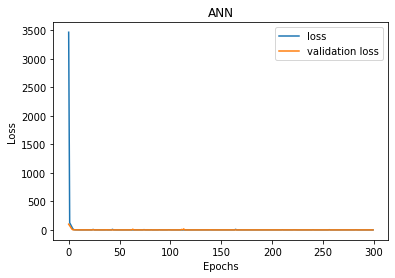

In [ ]:
import matplotlib.pyplot as plt
fig = plt.gcf()
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('ANN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()
fig.savefig('ANN.png', dpi=100)

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
y_predict

array([[16.755465 ],
       [12.944549 ],
       [ 5.759855 ],
       ...,
       [ 5.9027896],
       [25.335121 ],
       [83.11437  ]], dtype=float32)

In [ ]:
len(y_predict)

1133

In [ ]:
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(y_test, y_predict))
print('MAPE: ', metrics.mean_absolute_error(y_test, y_predict)*100)
print('MSE: ', metrics.mean_squared_error(y_test, y_predict))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print('RMAE: ', np.sqrt(metrics.mean_absolute_error(y_test, y_predict)))
print('R2: ', metrics.r2_score(y_test, y_predict))

MAE:  0.17813524387204757
MAPE:  17.813524387204758
MSE:  0.039998312399898796
RMSE:  0.19999578095524614
RMAE:  0.4220607111210988
R2:  0.9999935901519824
